# Visualizing xView chips - ships!

A notebook for visualizing the chips created with the process_xView_imgs.py

In [1]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
%matplotlib inline

In [2]:
# function to take in a metadata file and outputs a dictionary

from PIL import Image

def metadata_to_dict(metadata_filename=""):
	if not os.path.exists(metadata_filename):
		raise ValueError("metadata file %s does not exist.", metadata_filename)

	# create dictionary
		# key: file name of the image
		# value: a list of lists of coordinates
	data_dict = {}
	line_counter = 0
	with open(metadata_filename, 'r') as metadata_file:
		line = metadata_file.readline()
		while line:
			line_counter += 1
			bbxs = []
			
			if line_counter % 100 == 0:
				print("Read in {} lines".format(line_counter))

			fields = line.strip().split('\t')

			image_id = fields[0]
			timestamp = fields[1]
			image_path = fields[2]
			num_objects = int(fields[3])
			
			
			try:
				int(image_id)
			except ValueError:
				raise ValueError("Invalid image_id=%s at line %s" % (image_id, i))
			
			try:
				float(timestamp)
			except ValueError:
				raise ValueError("Invalid timestamp=%s at line %s" % (timestamp, i))

			
			assert len(fields)==(5*num_objects+4), "Insufficient data items in %s at line %d" % (metadata_file_path, i)


			# Get an image to store the image size in order to compute area in pixels. 
			if line_counter == 1:
				im = Image.open(image_path)
				im_w_pix, im_h_pix = im.size


			# normalize object labels     
			for j in range(num_objects): 
				obj_idx = 4 + 5*j
				class_label = fields[obj_idx]
								   
				for k in range(4):
					try:
						float(fields[obj_idx+1+k])
					except ValueError:
						raise ValueError("Invalid object data=%s at line %s" % (fields[obj_idx+1+k], i))
								   

				box = []
				box.append(fields[obj_idx+1])
				box.append(fields[obj_idx+2])
				box.append(fields[obj_idx+3])
				box.append(fields[obj_idx+4])

				bbxs.append(box)

			data_dict[image_path] = bbxs
			line = metadata_file.readline()

	return data_dict

In [5]:
xview_folder = '/home/physicsai/sim2real/data/xview/ships2/'
crop_name = 'full_256crops_0.0005thr'

metadata_dict = metadata_to_dict(xview_folder+"metadata_"+crop_name+".txt")

In [6]:
#metadata_dict['/home/physicsai/sim2real/data/xview/full_512crops_0.15thr/frame2386-000158.jpg']

In [7]:
from PIL import ImageDraw

def draw_metadata_bboxes(img_file_loc,boxes):
    """
    A helper function to draw bounding box rectangles on images

    Args:
        img: image to be drawn on in array format
        boxes: An (N,4) array of bounding boxes

    Output:
        Image with drawn bounding boxes
    """
    im = Image.open(img_file_loc)
    #source = Image.fromarray(img)
    draw = ImageDraw.Draw(im)
    im_w, im_h = im.size

    #print(im_w, im_h)

    idx = 0

    for b in boxes:
        x,y,w,h = b
        x_pix = int(float(x)*im_w)
        y_pix = int(float(y)*im_h)
        w_pix = int(float(w)*im_w)
        h_pix = int(float(h)*im_h)

        x1, y1 = x_pix - int(w_pix/2.0), y_pix - int(h_pix/2.0)
        x2, y2 = x_pix + int(w_pix/2.0), y_pix + int(h_pix/2.0)

        #print(x, y, w, h)
        #print(x_pix, y_pix, w_pix, h_pix)
        
        #for j in range(3):
        #    draw.rectangle(((x1+j, y1+j), (x2+j, y2+j)), outline="red")
        draw.rectangle(((x1, y1), (x2, y2)), outline="red", width=2)
    return im

In [8]:
import glob

all_imgs = glob.glob(xview_folder+crop_name+'/*.jpg')

In [9]:
all_imgs[:5]

['/home/physicsai/sim2real/data/xview/ships2/full_256crops_0.0005thr/tif01285-000059.jpg',
 '/home/physicsai/sim2real/data/xview/ships2/full_256crops_0.0005thr/tif02557-000320.jpg',
 '/home/physicsai/sim2real/data/xview/ships2/full_256crops_0.0005thr/tif00927-000390.jpg',
 '/home/physicsai/sim2real/data/xview/ships2/full_256crops_0.0005thr/tif01438-000094.jpg',
 '/home/physicsai/sim2real/data/xview/ships2/full_256crops_0.0005thr/tif01120-000024.jpg']

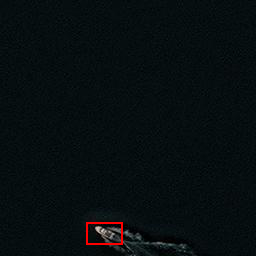

In [10]:
draw_metadata_bboxes(all_imgs[0], metadata_dict[all_imgs[0]])

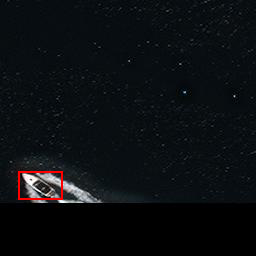

In [11]:
draw_metadata_bboxes(all_imgs[1], metadata_dict[all_imgs[1]])

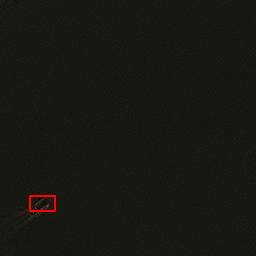

In [12]:
draw_metadata_bboxes(all_imgs[2], metadata_dict[all_imgs[2]])

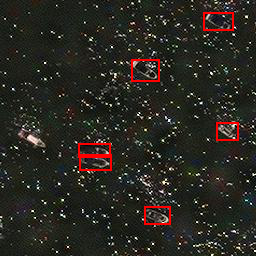

In [13]:
draw_metadata_bboxes(all_imgs[3], metadata_dict[all_imgs[3]])

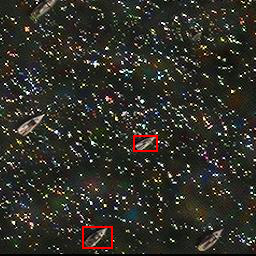

In [21]:
''
img_name = '/home/physicsai/sim2real/data/xview/ships2/full_256crops_0.0005thr/tif01438-000118.jpg'
draw_metadata_bboxes(img_name, metadata_dict[img_name])


In [49]:
'2370.tif'
'2371.tif'
'2386.tif'

check2370 = [im for im in all_imgs if 'frame2370' in im]
check2371 = [im for im in all_imgs if 'frame2371' in im]
check2386 = [im for im in all_imgs if 'frame2386' in im]

print(check2370)
print(check2371)
print(check2386)

[]
['/home/physicsai/sim2real/data/xview/full_1024crops_0.01thr_center/frame2371-000124.jpg']
['/home/physicsai/sim2real/data/xview/full_1024crops_0.01thr_center/frame2386-000126.jpg', '/home/physicsai/sim2real/data/xview/full_1024crops_0.01thr_center/frame2386-000125.jpg']


In [14]:
#draw_metadata_bboxes(check2371[0], metadata_dict[check2371[0]])

In [15]:
#draw_metadata_bboxes(check2386[0], metadata_dict[check2386[0]])

In [16]:
#draw_metadata_bboxes(check2386[1], metadata_dict[check2386[1]])

In [17]:
#img_name = '/home/physicsai/sim2real/data/xview/full_512crops_0.15thr/frame2386-000158.jpg'
#draw_metadata_bboxes(img_name, metadata_dict[img_name])

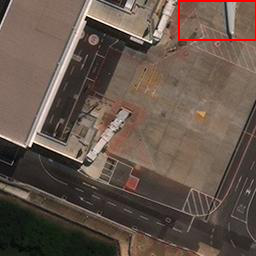

In [63]:
img_name = '/home/physicsai/sim2real/data/xview/full_256crops_0.05thr/frame00000001.jpg'
draw_metadata_bboxes(img_name, metadata_dict[img_name])

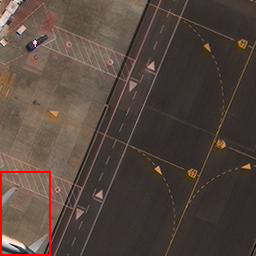

In [64]:
img_name = '/home/physicsai/sim2real/data/xview/full_256crops_0.05thr/frame00000002.jpg'
draw_metadata_bboxes(img_name, metadata_dict[img_name])

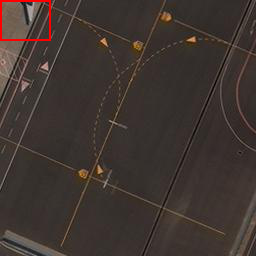

In [65]:
img_name = '/home/physicsai/sim2real/data/xview/full_256crops_0.05thr/frame00000003.jpg'
draw_metadata_bboxes(img_name, metadata_dict[img_name])

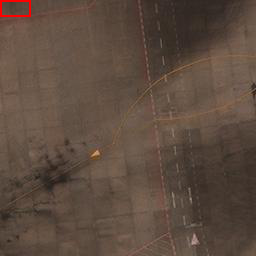

In [66]:
img_name = '/home/physicsai/sim2real/data/xview/full_256crops_0.05thr/frame00000020.jpg'
draw_metadata_bboxes(img_name, metadata_dict[img_name])

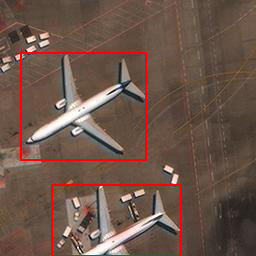

In [67]:
img_name = '/home/physicsai/sim2real/data/xview/full_256crops_0.05thr/frame00000021.jpg'
draw_metadata_bboxes(img_name, metadata_dict[img_name])

## now for 512 images

In [84]:
metadata_dict512 = metadata_to_dict("/home/physicsai/sim2real/data/xview/metadata_full_512crops_0.15thr.txt")

Read in 100 lines
Read in 200 lines


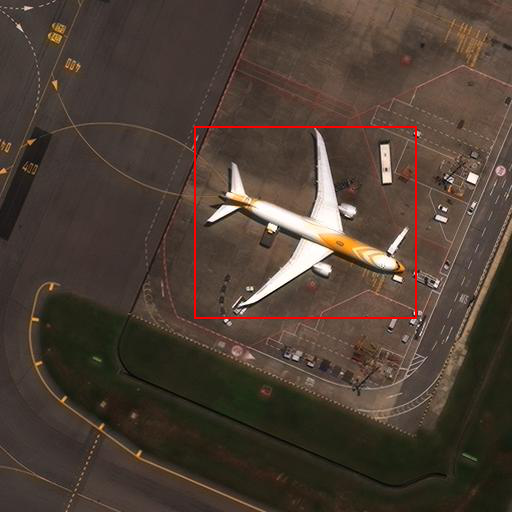

In [85]:
img_name = '/home/physicsai/sim2real/data/xview/full_512crops_0.15thr/frame00000021.jpg'
draw_metadata_bboxes(img_name, metadata_dict512[img_name])

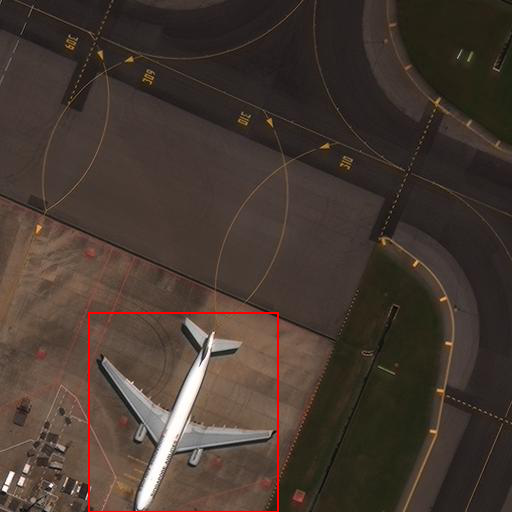

In [86]:
img_name = '/home/physicsai/sim2real/data/xview/full_512crops_0.15thr/frame00000022.jpg'
draw_metadata_bboxes(img_name, metadata_dict512[img_name])

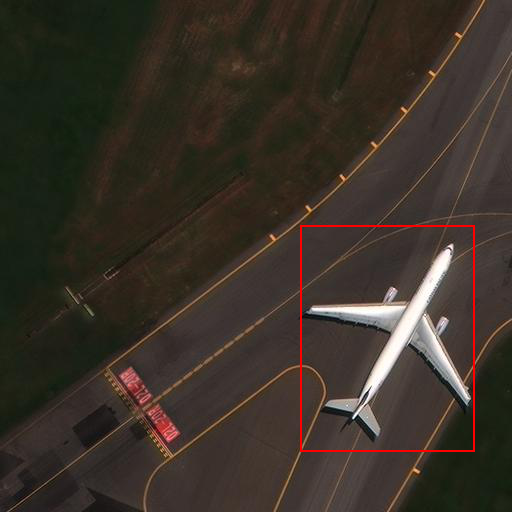

In [87]:
img_name = '/home/physicsai/sim2real/data/xview/full_512crops_0.15thr/frame00000023.jpg'
draw_metadata_bboxes(img_name, metadata_dict512[img_name])

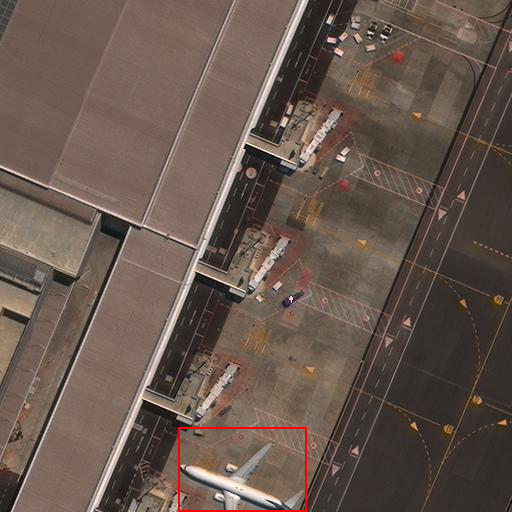

In [88]:
img_name = '/home/physicsai/sim2real/data/xview/full_512crops_0.15thr/frame00000000.jpg'
draw_metadata_bboxes(img_name, metadata_dict512[img_name])